In [21]:
from sklearn.datasets import fetch_20newsgroups
data = fetch_20newsgroups()
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [22]:
#print("tamaño de esta base de datos: {}".format(my_data.shape))

solo seleccionaremos algunas categorias

In [23]:
categories = ['talk.religion.misc','soc.religion.christian','sci.space','comp.graphics']

In [24]:
train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)

Un ejemplo representativo de los datos seria:

In [42]:
print(train.data[5])

From: dmcgee@uluhe.soest.hawaii.edu (Don McGee)
Subject: Federal Hearing
Originator: dmcgee@uluhe
Organization: School of Ocean and Earth Science and Technology
Distribution: usa
Lines: 10


Fact or rumor....?  Madalyn Murray O'Hare an atheist who eliminated the
use of the bible reading and prayer in public schools 15 years ago is now
going to appear before the FCC with a petition to stop the reading of the
Gospel on the airways of America.  And she is also campaigning to remove
Christmas programs, songs, etc from the public schools.  If it is true
then mail to Federal Communications Commission 1919 H Street Washington DC
20054 expressing your opposition to her request.  Reference Petition number

2493.



para poder usar estos datos para el aprendizaje automatico, debemos poder convertir el contenido de cada cadena en un vetor de numeros. Para esto usaremos el vectorizador TF-IDF y crearemos una canalizacion que lo adjunte a un clasificados de Bayes ingenuo multinomial:

In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from matplotlib import pyplot as plt
import seaborn as sns

In [44]:
model = make_pipeline(TfidfVectorizer(), MultinomialNB())

In [45]:
model.fit(train.data, train.target)
labels = model.predict(test.data)

In [46]:
from sklearn.metrics import confusion_matrix

Text(113.92222222222219, 0.5, 'predicted lavel')

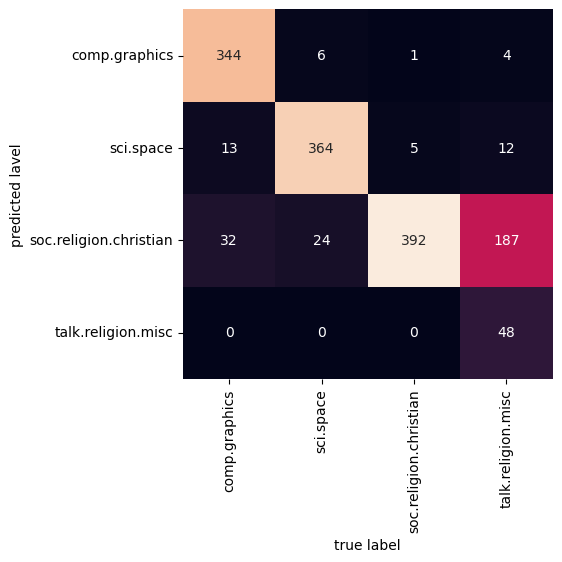

In [47]:
mat = confusion_matrix(test.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d',cbar=False, xticklabels=train.target_names, yticklabels=train.target_names)

plt.xlabel('true label')
plt.ylabel('predicted lavel')

In [48]:
def predict_category(s, train=train, model=model):
    pred = model.predict([s])
    return train.target_names[pred[0]]

In [49]:
predict_category('the violence in the world is very Funny')

'soc.religion.christian'

In [40]:
# Hablando de El canto de la farsalea
predict_category("There really is intentional and cordial antipathy, and precisely already from these first songs of the poem19. It is not surprising, therefore, the attitudes reluctant to accept the role of hero for Caesar on the part of those who demand the author's sympathy at all costs. Now, this requirement is not general, nor does it have to be, as has already been seen at the beginning of this part, when speculating on the characteristics of the classic epic hero. For this reason, it is possible that some among those who do not feel it continue to advocate the attribution of said role to César. However, the weight of the antipathy is such that, in general, they agree on a very significant assessment: Caesar would be the negative hero of the epic.")

'soc.religion.christian'

In [41]:
#Fragmento del mio cid
predict_category("They sent their message to the king of Valencia, that one they call Mío Cid Ruy de Vivar, who angered King Alfonso and has thrown him out of his land, came to camp on Alcocer, a fortified place, tricked them out, the castle has won, if you don't give us help, you will lose Ateca and Terrer, you will lose Calatayud who cannot be saved, everything will go wrong on the banks of the Jalón, the same thing will happen on the other side.")

'soc.religion.christian'